# Using machine learning to predict a student's grade for the course Probability and Statistics

This notebook is exploring different machine learning techniques and models to predict the grade for VIS course.

## Content:
- Preparing the data
- Regression models:
  - Deep learning regression
  - Random forest regressor
  - Support vector regressor
- Comparing the models

## Features
Features are the students grades for past courses from first and second semester. 
8 in total: VVKN, SP, DM, ONVD, OOP, K, AOK, AIPS

### Missing values
Some students don't take all these courses, so for the value is generated as an average from similar courses.

Example: For students that dont take DM course, the value is generated as an average from DS1 and DS2, where the same material is studied but in more depth in 2 courses.

## Dataset
The dataset includes 226 rows(different students) each with 8 features and the class value.

The dataset is provided from the finki students spreadsheet available [here](https://docs.google.com/spreadsheets/d/1OdGsQhTcJbM8iOnWCDg6urL1n2gOi7SxePYKPZXyt-g/edit#gid=587194799)

As data about final VIS grades isn't available, it is taken from the initial theory grades with some modification.


# Loading the data

Fortunately the data is relatively clean since a grade can only take six values 5-10 (F-A). We don't need any kind of encoding because the values are integers and we don't need to scale the data.

In [215]:
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import math

In [216]:
# Load and shuffle the data
dataset = pd.read_excel('/content/ocenki.xlsx', header=0)
dataset = dataset.drop('Name',axis=1)
dataset = dataset.drop('Id',axis=1)
dataset = dataset.iloc[np.random.permutation(len(dataset))]
dataset.head()

,VVKN,SP,DM,ONVD,OOP,K,AOK,AIPS,VIS
223,9,10,6,10,9,8,6,7,5
205,8,6,6,5,6,6,5,6,5
45,10,10,8,9,9,8,7,8,6
221,9,6,6,8,8,6,7,5,5
191,9,6,6,9,8,7,7,5,5


## Correlation between the features
As we can see from the below cell, there is strong correlation between VIS and some of the courses, especially between more mathematical subjects like DM and K

In [217]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,VVKN,SP,DM,ONVD,OOP,K,AOK,AIPS,VIS
VVKN,1.000000,0.498521,0.536310,0.495440,0.601853,0.541729,0.524857,0.426380,0.521662
SP,0.498521,1.000000,0.496364,0.390149,0.638256,0.493722,0.346409,0.466842,0.474922
DM,0.536310,0.496364,1.000000,0.475337,0.655763,0.689663,0.621582,0.465501,0.765932
ONVD,0.495440,0.390149,0.475337,1.000000,0.484170,0.481074,0.571165,0.324697,0.487838
OOP,0.601853,0.638256,0.655763,0.484170,1.000000,0.582358,0.479270,0.478446,0.601912
K,0.541729,0.493722,0.689663,0.481074,0.582358,1.000000,0.576741,0.462842,0.753729
AOK,0.524857,0.346409,0.621582,0.571165,0.479270,0.576741,1.000000,0.465390,0.605563
AIPS,0.426380,0.466842,0.465501,0.324697,0.478446,0.462842,0.465390,1.000000,0.570915
VIS,0.521662,0.474922,0.765932,0.487838,0.601912,0.753729,0.605563,0.570915,1.000000


In [218]:
# Split the data
features = dataset.drop('VIS',axis=1)
classes = dataset['VIS']
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.2)

# Models

## Deep learning regression

In [291]:
# build the model with 2 hidden layers
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(),metrics=['mae', 'mse'])

In [292]:
# fit with 200 epochs
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test), verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 36ms/step - loss: 24.2223 - mae: 4.7101 - mse: 24.2223 - val_loss: 20.8778 - val_mae: 4.2969 - val_mse: 20.8778
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 11.6587 - mae: 3.1859 - mse: 11.6587 - val_loss: 9.5866 - val_mae: 2.7804 - val_mse: 9.5866
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 4.9191 - mae: 1.8898 - mse: 4.9191 - val_loss: 4.1568 - val_mae: 1.6732 - val_mse: 4.1568
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 2.1285 - mae: 1.1451 - mse: 2.1285 - val_loss: 2.1411 - val_mae: 1.1689 - val_mse: 2.1411
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 1.2909 - mae: 0.8819 - mse: 1.2909 - val_loss: 1.5147 - val_mae: 0.9898 - val_mse: 1.5147
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 1.1213 - mae: 0.8373 - mse: 1.1213 - val_loss: 1.3567 - val_mae: 0.9271 - val_mse: 1.3567
Epoch 7/200
6/6 [=========

In [261]:
# graph values
import seaborn as sns
import matplotlib.pyplot as plt


def plot_graph_loss(history):
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model error')
    plt.ylabel('error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

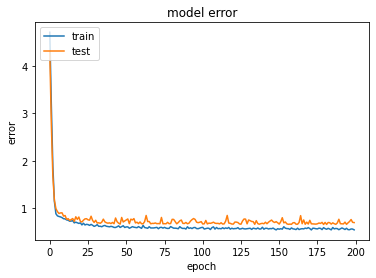

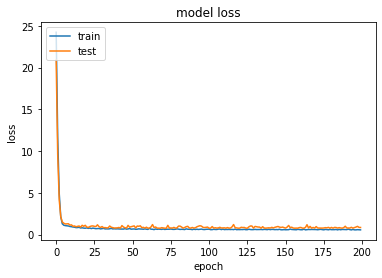

1/1 [==============================] - 0s 22ms/step - loss: 0.8523 - mae: 0.6958 - mse: 0.8523


[0.8523407578468323, 0.6957593560218811, 0.8523407578468323]

In [293]:
# graph error and loss

plot_graph_loss(history)
model.evaluate(X_test, y_test, batch_size=128)

As we can see with this approach we are getting mean absolute error on the test set of 0.7095

In [184]:
# sample prediction
print(X_test[:5])
model.predict(X_test[:5])

     VVKN  SP  DM  ONVD  OOP   K  AOK  AIPS
71      7   5   6     5    5   5    7     5
165     7   6   7     8    5   6    6     6
15     10  10  10     9   10   9    8     9
8      10  10  10    10   10  10   10    10
172     7   7   5     6    7   6    5     7


array([[4.4682674],
       [5.480187 ],
       [8.5016575],
       [9.244143 ],
       [5.156545 ]], dtype=float32)

In [192]:
# save to google drive
from google.colab import drive
import joblib
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
model.save('/content/gdrive/My Drive/VIS_Predictors/deep_learning')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/VIS_Predictors/deep_learning" /assets


## Random forest regressor

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
# init model with 100 trees
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [159]:
# function to calculate MAE on test set

def mae(real,pred):
  score = 0
  for x,y in zip(real,pred):
    score += abs(x-y)
  return score/len(real)

In [189]:
mae(y_test,forest_model.predict(X_test))

0.5886666666666666

In [190]:
# sample prediction
print(X_test[:5])
forest_model.predict(X_test[:5])

     VVKN  SP  DM  ONVD  OOP   K  AOK  AIPS
71      7   5   6     5    5   5    7     5
165     7   6   7     8    5   6    6     6
15     10  10  10     9   10   9    8     9
8      10  10  10    10   10  10   10    10
172     7   7   5     6    7   6    5     7


array([ 5.  ,  5.61,  9.19, 10.  ,  5.  ])

In [193]:
joblib.dump(forest_model,'/content/gdrive/My Drive/VIS_Predictors/random_forest')

['/content/gdrive/My Drive/VIS_Predictors/random_forest']

## Support vector regressor

In [195]:
from sklearn.svm import SVR

In [196]:
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [198]:
mae(y_test,svr.predict(X_test))

0.5757642727678641

In [200]:
# sample prediction
print(X_test[:5])
svr.predict(X_test[:5])

     VVKN  SP  DM  ONVD  OOP   K  AOK  AIPS
71      7   5   6     5    5   5    7     5
165     7   6   7     8    5   6    6     6
15     10  10  10     9   10   9    8     9
8      10  10  10    10   10  10   10    10
172     7   7   5     6    7   6    5     7


array([5.27616709, 5.31191428, 9.07128028, 9.80002598, 4.87743215])

In [201]:
joblib.dump(svr,'/content/gdrive/My Drive/VIS_Predictors/svr')

['/content/gdrive/My Drive/VIS_Predictors/svr']

# Comparing the models
Considering this is a small limited dataset it makes sense that nearly all models output simlar mean absolute error on the test set. Support vector regression has the best MAE of 0.57. Deep learning with some tuning of the hyperparameters can probably go even lower than 0.69.